# Data Preprocessing

Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient  

**The target attribute is Stroke**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np

In [10]:
# load the original data
data = pd.read_csv('dataset_original.csv')

# sneak peak into the original data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We can drop the id column since it has no affect on the target variable

In [11]:
# dropping the id column
data.drop('id', axis=1, inplace=True)

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


We have 9 independant features and 1 dependant feature (stroke)

## Missing values

Our dataset might have some NaN or missing values

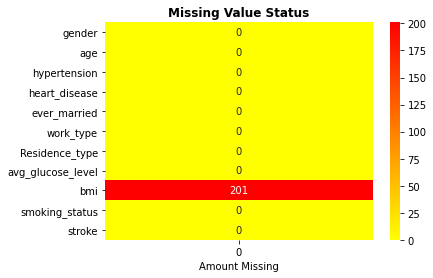

In [21]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='autumn_r')
ax.set_xlabel('Amount Missing')
plt.show()

We can see we have 201 entries for bmi which are NaN

## Imputing the Missing Data

We will replace the missing data values with substituted values. There can be many approaches to this (https://towardsdatascience.com/handling-missing-data-12ac7c59eebc)
- Mean
- Mode
- Interpolation
- K-nearest neighbour imputer

(read on them in the article, expand on in thesis) We will use KNNImputer

In [41]:
# we need to convert the catagorical datatypes to a float or int
# to convert, we need to know all the unique categories for each categorical datatype
for col in data.select_dtypes(include='object'):
    print(f'{col} --> {data[col].unique()}')

gender --> ['Male' 'Female' 'Other']
ever_married --> ['Yes' 'No']
work_type --> ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type --> ['Urban' 'Rural']
smoking_status --> ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [42]:
# make a copy of the dataset
data_copy = data.copy()

# for gender replace Male with 0, Female with 1 and Other with -1
data_copy['gender'] = data_copy['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(int)

# for ever_married, replace Yes with 1 and No with 0
data_copy['ever_married'] = data_copy['ever_married'].replace({'Yes':1, 'No':0}).astype(int)

# for work_type, replace Private with 0, Self-employed with 1, Govt_job with 2, children with 3 and Never_worked with 4
data_copy['work_type'] = data_copy['work_type'].replace({'Private':0, 
                                                         'Self-employed':1, 
                                                         'Govt_job':2, 
                                                         'children':3, 
                                                         'Never_worked':4}).astype(int)

# for Residence_type, replace Urban with 0 and Rural with 1
data_copy['Residence_type'] = data_copy['Residence_type'].replace({'Urban':0, 'Rural':1}).astype(int)

# for smoking_status, replace formerly smoked with 0, never smoked with 1, smokes with 2 and Unknown with 3
data_copy['smoking_status'] = data_copy['smoking_status'].replace({'formerly smoked':0, 
                                                                   'never smoked':1, 
                                                                   'smokes':2, 
                                                                   'Unknown':3}).astype(int)

In [45]:
# Compare new and old dataframes
data_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,0,228.69,36.6,0,1
1,1,61.0,0,0,1,1,1,202.21,NaN,1,1
2,0,80.0,0,1,1,0,1,105.92,32.5,1,1
3,1,49.0,0,0,1,0,0,171.23,34.4,2,1
4,1,79.0,1,0,1,1,1,174.12,24.0,1,1


In [46]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [53]:
# Now we are ready to apply KNNImpute
knn_imputer = KNNImputer(n_neighbors=2)
# data_copy = knn_impute.fit_transform(data_copy)
data_copy = pd.DataFrame(knn_imputer.fit_transform(data_copy),columns = data_copy.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [51]:
data_copy

array([[ 0.  , 67.  ,  0.  , ..., 36.6 ,  0.  ,  1.  ],
       [ 1.  , 61.  ,  0.  , ..., 31.75,  1.  ,  1.  ],
       [ 0.  , 80.  ,  0.  , ..., 32.5 ,  1.  ,  1.  ],
       ...,
       [ 1.  , 35.  ,  0.  , ..., 30.6 ,  1.  ,  0.  ],
       [ 0.  , 51.  ,  0.  , ..., 25.6 ,  0.  ,  0.  ],
       [ 1.  , 44.  ,  0.  , ..., 26.2 ,  3.  ,  0.  ]])